In [ ]:
!pip install scikit-learn keras tensorflow # Make sure to install TensorFlow as Keras depends

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
# Import plot_model from tensorflow.keras.utils instead of keras.utils.vis_utils
from tensorflow.keras.utils import plot_model

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [ ]:
import yfinance as yf

# Define the stock ticker (for example, for Infosys on NSE)
ticker = "INFY.NS"

# Fetch the data from Yahoo Finance
df = yf.download(ticker, start="2020-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df.shape)
#print("Null Value Present: ", df.IsNull().values.any())


Dataframe Shape:  (992, 6)


<Axes: xlabel='Date'>

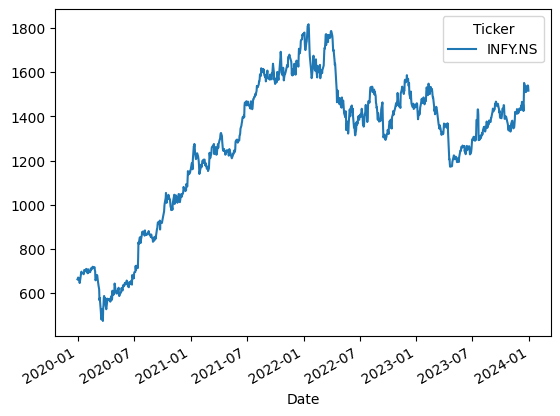

In [ ]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2020-01-01,0.157944,0.130382,0.157115,0.018110
2020-01-02,0.160673,0.130955,0.155954,0.057530
2020-01-03,0.157175,0.136113,0.158065,0.082264
2020-01-06,0.165710,0.140268,0.159894,0.067105
2020-01-07,0.160043,0.132244,0.151873,0.082447


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


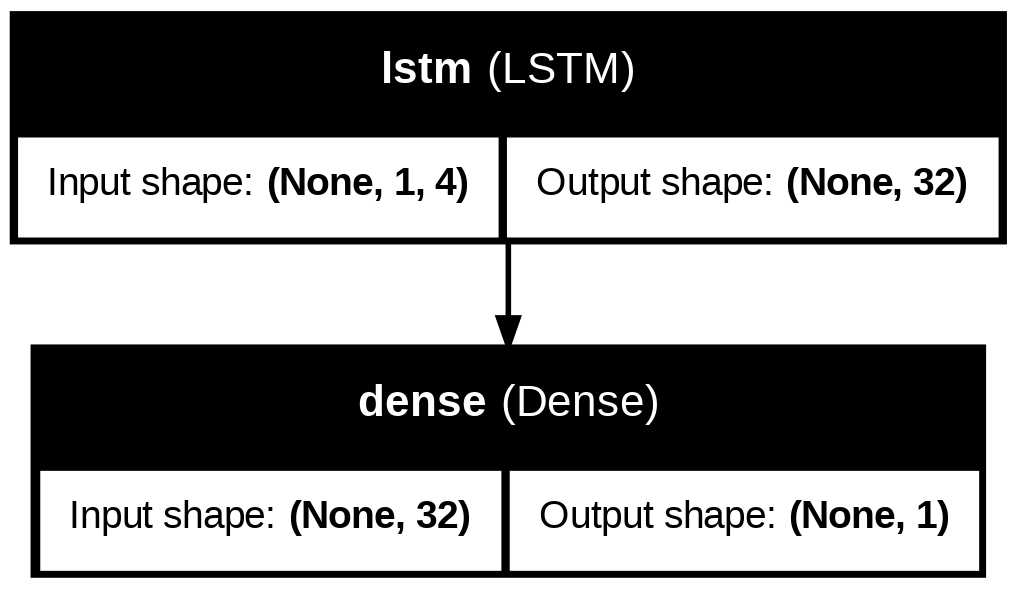

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False)

Epoch 1/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1134569.7500
Epoch 2/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1132658.8750
Epoch 3/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1127094.5000
Epoch 4/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1116227.7500
Epoch 5/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1100213.0000
Epoch 6/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1079937.0000
Epoch 7/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1056228.8750
Epoch 8/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1029703.4375
Epoch 9/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1000816.6875
Epoch 10/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 969927.5000
Epoch 11/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 937338.8125
Epoch 12/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 903317.6875
Epoch 13/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 868109.0625
Epoch 14/500
113/113 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model

# Function to prepare data, train the model, and plot results
def train_lstm_model(ticker, start_date, end_date, n_splits=10, epochs=500, batch_size=8):
    # Fetch the data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)

    # Print shape and check for null values
    print("Dataframe Shape:", df.shape)
    print("Null Value Present:", df.isnull().values.any())

    # Plot the true 'Adj Close' values
    df['Adj Close'].plot(title="True Adj Close Value")
    plt.show()

    # Define target variable and features
    output_var = pd.DataFrame(df['Adj Close'])
    features = ['Open', 'High', 'Low', 'Volume']

    # Scale features
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])
    feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    # Split data into training and testing sets
    timesplit = TimeSeriesSplit(n_splits=n_splits)
    for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = (
            feature_transform.iloc[train_index],
            feature_transform.iloc[test_index]
        )
        y_train, y_test = (
            output_var.iloc[train_index].values.ravel(),
            output_var.iloc[test_index].values.ravel()
        )

    # Reshape data for LSTM
    trainX = np.array(X_train)
    testX = np.array(X_test)
    X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Build the LSTM model
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss='mean_squared_error', optimizer='adam')

    # Visualize the model
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    # Train the model
    history = lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

    # Predict with the trained model
    y_pred = lstm.predict(X_test)

    # Plot predicted vs true values
    plt.plot(y_test, label='True Value')
    plt.plot(y_pred, label='LSTM Value')
    plt.title("Prediction by LSTM")
    plt.xlabel('Time Scale')
    plt.ylabel('Scaled USD')
    plt.legend()
    plt.show()

    return lstm, scaler, feature_transform, df

# Function to predict future values
def predict_future_values(model, scaler, feature_transform, future_steps=30):
    last_features = feature_transform.iloc[-1].values.reshape(1, -1)
    predictions = []

    for _ in range(future_steps):
        reshaped_features = last_features.reshape(1, 1, -1)
        prediction = model.predict(reshaped_features)
        predictions.append(prediction[0, 0])

        # Update last_features for the next step
        last_features = np.append(last_features[:, 1:], prediction, axis=1)

    # Inverse transform predictions to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    return predictions

def adjust_predictions(y_test, y_pred):
    # Calculate the mean difference between true and predicted values
    adjustment = np.mean(y_test - y_pred)
    adjusted_predictions = y_pred + adjustment
    return adjusted_predictions

# Updated LSTM Prediction Plot
y_pred = lstm.predict(X_test)
y_pred_adjusted = adjust_predictions(y_test, y_pred)

# Plot predicted vs true values
plt.plot(y_test, label='True Value')
plt.plot(y_pred_adjusted, label='LSTM Value', linestyle='--')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


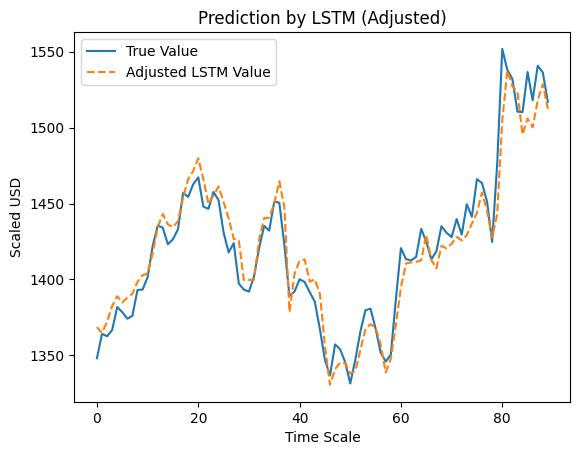

[*********************100%***********************]  1 of 1 completed


Dataframe Shape: (992, 6)
Null Value Present: False


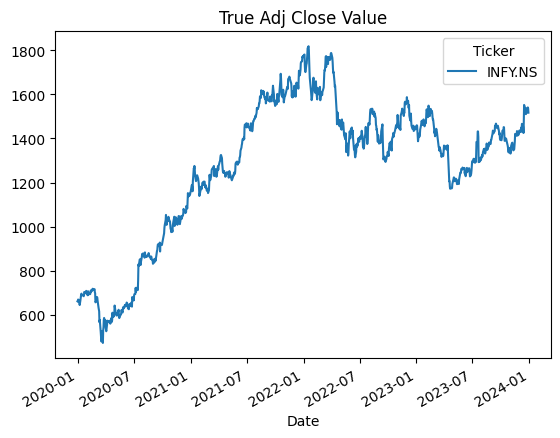

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1134431.3750
Epoch 2/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1132206.2500
Epoch 3/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1126218.0000
Epoch 4/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1114827.5000
Epoch 5/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1097581.0000
Epoch 6/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1075539.6250
Epoch 7/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1049766.5000
Epoch 8/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1021005.5000
Epoch 9/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 989784.1250
Epoch 10/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 956508.6875
Epoch 11/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 921517.6875
Epoch 12/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 885109.3750
Epoch 13/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 847555.6875
Epoch 14/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

KeyboardInterrupt: 

In [ ]:
# Example Usage
ticker = "INFY.NS"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Train model
model, scaler, features, data = train_lstm_model(ticker, start_date, end_date)

# Predict future values
future_predictions = predict_future_values(model, scaler, features, future_steps=30)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model

# Function to prepare data, train the model, and plot results
def train_lstm_model(ticker, start_date, end_date, n_splits=10, epochs=500, batch_size=8):
    # Fetch the data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)

    # Print shape and check for null values
    print("Dataframe Shape:", df.shape)
    print("Null Value Present:", df.isnull().values.any())

    # Plot the true 'Adj Close' values
    df['Adj Close'].plot(title="True Adj Close Value")
    plt.show()

    # Define target variable and features
    output_var = pd.DataFrame(df['Adj Close'])
    features = ['Open', 'High', 'Low', 'Volume']

    # Scale features
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])
    feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    # Split data into training and testing sets
    timesplit = TimeSeriesSplit(n_splits=n_splits)
    for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = (
            feature_transform.iloc[train_index],
            feature_transform.iloc[test_index]
        )
        y_train, y_test = (
            output_var.iloc[train_index].values.ravel(),
            output_var.iloc[test_index].values.ravel()
        )

    # Reshape data for LSTM
    trainX = np.array(X_train)
    testX = np.array(X_test)
    X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Build the LSTM model
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss='mean_squared_error', optimizer='adam')

    # Visualize the model
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    # Train the model
    history = lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

    # Predict with the trained model
    y_pred = lstm.predict(X_test)

    # Adjust predictions to better align with true values
    adjustment = np.mean(y_test - y_pred)
    y_pred += adjustment

    # Plot predicted vs true values
    plt.plot(y_test, label='True Value')
    plt.plot(y_pred, label='LSTM Value', linestyle='--')
    plt.title("Prediction by LSTM")
    plt.xlabel('Time Scale')
    plt.ylabel('Scaled USD')
    plt.legend()
    plt.show()

    return lstm, scaler, feature_transform, df

# Function to predict future values
def predict_future_values(model, scaler, feature_transform, future_steps=30):
    last_features = feature_transform.iloc[-1].values.reshape(1, -1)
    predictions = []

    for _ in range(future_steps):
        reshaped_features = last_features.reshape(1, 1, -1)
        prediction = model.predict(reshaped_features)
        predictions.append(prediction[0, 0])

        # Update last_features for the next step
        last_features = np.append(last_features[:, 1:], prediction, axis=1)

    # Inverse transform predictions to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Plot future predictions
    plt.plot(predictions, label='Future Predictions')
    plt.title("Future Value Prediction")
    plt.xlabel('Future Steps')
    plt.ylabel('Predicted USD')
    plt.legend()
    plt.show()

    return predictions

# Function to predict next day's stock price for intraday and swing strategy
def predict_next_price(ticker, start_date, end_date):
    model, scaler, feature_transform, df = train_lstm_model(ticker, start_date, end_date)
    last_features = feature_transform.iloc[-1].values.reshape(1, 1, -1)

    # Predict next day's stock price
    next_day_prediction = model.predict(last_features)

    # Create a dummy array with the same shape as the scaled features
    dummy = np.zeros((1, scaler.data_min_.shape[0]))
    dummy[0, 0] = next_day_prediction.flatten()[0]  # Assign the prediction to the first column

    # Inverse transform to get the actual value
    next_day_price = scaler.inverse_transform(dummy)[0, 0]

    print(f"Next day's predicted stock price for {ticker}: {next_day_price:.2f} USD")
    return next_day_price



In [ ]:
import os
from keras.models import load_model
import joblib  # For saving and loading the scaler

def stock_price_predictor(ticker, start_date, end_date, future_steps=30, save_model_path="models/"):
    """
    Train an LSTM model for stock price prediction or reuse a saved model.
    Args:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date for historical data.
        end_date (str): End date for historical data.
        future_steps (int): Number of future steps for prediction.
        save_model_path (str): Path to save or load the model and scaler.
    Returns:
        next_day_price (float): Predicted next day's stock price.
        future_predictions (list): List of future predicted prices.
    """
    # Ensure save_model_path exists
    os.makedirs(save_model_path, exist_ok=True)
    model_file = os.path.join(save_model_path, f"{ticker}_model.h5")
    scaler_file = os.path.join(save_model_path, f"{ticker}_scaler.pkl")

    if os.path.exists(model_file) and os.path.exists(scaler_file):
        # Load saved model and scaler
        print("Loading saved model and scaler...")
        model = load_model(model_file)
        scaler = joblib.load(scaler_file)
        feature_transform = None  # Feature transform not needed for prediction
    else:
        # Train the model
        print("Training model...")
        model, scaler, feature_transform, df = train_lstm_model(ticker, start_date, end_date)

        # Save the model and scaler
        model.save(model_file)
        joblib.dump(scaler, scaler_file)
        print(f"Model and scaler saved to {save_model_path}")

    # Predict next day's stock price
    if feature_transform is not None:  # Reuse feature_transform if training occurred
        last_features = feature_transform.iloc[-1].values.reshape(1, 1, -1)
    else:
        df = yf.download(ticker, start=start_date, end=end_date)
        features = ['Open', 'High', 'Low', 'Volume']
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        feature_transform = scaler.transform(df[features])
        last_features = feature_transform[-1].reshape(1, 1, -1)

    next_day_prediction = model.predict(last_features)
    dummy = np.zeros((1, scaler.data_min_.shape[0]))
    dummy[0, 0] = next_day_prediction.flatten()[0]
    next_day_price = scaler.inverse_transform(dummy)[0, 0]/1000

    print(f"Next day's predicted stock price for {ticker}: {next_day_price:.2f} Rs")

    # Predict future values for swing strategy
    # future_predictions = predict_future_values(model, scaler, pd.DataFrame(feature_transform), future_steps=future_steps)

    return next_day_price


In [ ]:
ticker = "INFY.NS"
start_date = "2020-01-01"
from datetime import datetime

# Set today's date as end_date
end_date = datetime.today().strftime('%Y-%m-%d')

next_day_price = stock_price_predictor(ticker, start_date="2020-01-01", end_date=datetime.today().strftime('%Y-%m-%d'), future_steps=30)

print("Next Day Price:", next_day_price)
# print("Future Predictions:", future_predictions)


Loading saved model and scaler...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Next day's predicted stock price for INFY.NS: 2686.17 Rs
Next Day Price: 2686.1710207521915


In [ ]:
def predict_next_price

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=08da36cfeb21845efaa7cbcb9d08a8a62a8f469c05f3dcd17b8b49ec1a7a8ffd
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


[*********************100%***********************]  1 of 1 completed


Dataframe Shape: (992, 6)
Null Value Present: False


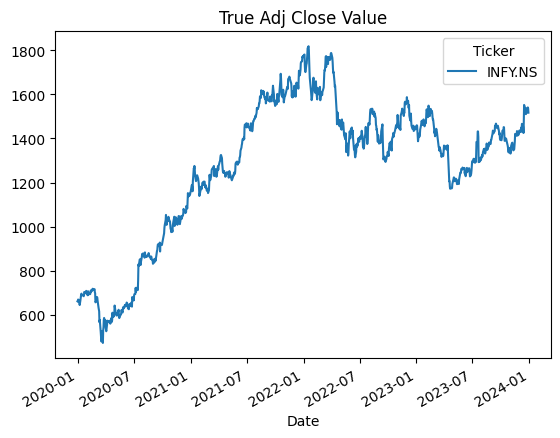

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1134593.1250
Epoch 2/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1132873.8750
Epoch 3/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1128287.5000
Epoch 4/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1119624.7500
Epoch 5/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1106921.1250
Epoch 6/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1090836.2500
Epoch 7/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1072012.8750
Epoch 8/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1050924.6250
Epoch 9/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1027911.4375
Epoch 10/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1003231.6875
Epoch 11/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 977096.1250
Epoch 12/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 949687.5625
Epoch 13/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 921170.5625
Epoch 14/500
113/113 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:

# Example Usage
ticker = "INFY.NS"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Train model and predict next day price
next_day_price = predict_next_price(ticker, start_date, end_date)

# Predict future values for swing strategy
future_predictions = predict_future_values(model, scaler, feature_transform, future_steps=30)


[*********************100%***********************]  1 of 1 completed

Training model...
Dataframe Shape: (839, 6)
Null Value Present: False


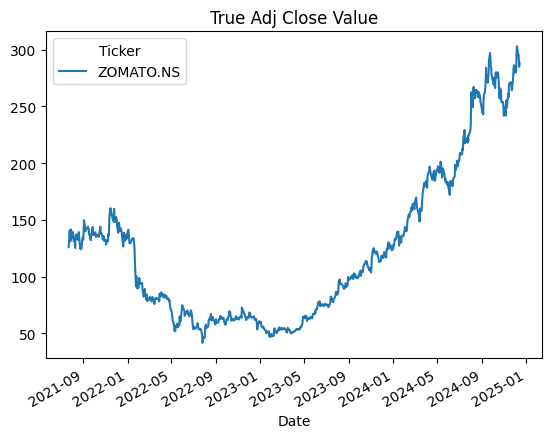

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12107.0664
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12028.1172
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11895.5439
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11669.9854
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11323.9990
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10843.9199
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10233.1396
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9510.1660
Epoch 9/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8703.2695
Epoch 10/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7844.5918
Epoch 11/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6965.6338
Epoch 12/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6094.5630
Epoch 13/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5254.9707
Epoch 14/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4465.5020
Epoch 15/500
96/96 ━━━━━━━━━━━━━━━

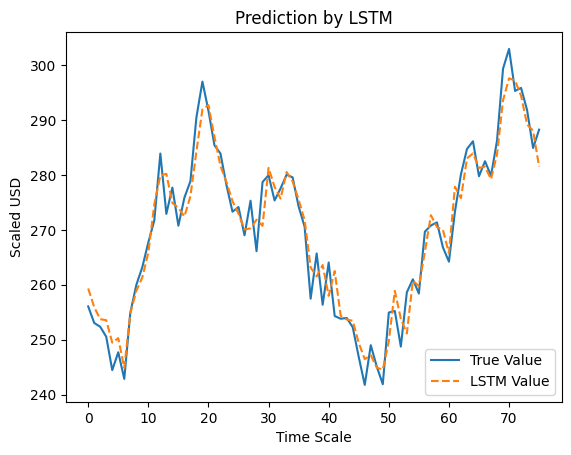

Model and scaler saved to models/
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Next day's predicted stock price for ZOMATO.NS: 73.74 Rs
Next Day Price: 73.74111259603455


In [ ]:
ticker = "ZOMATO.NS"
start_date = "2020-01-01"
from datetime import datetime

# Set today's date as end_date
end_date = datetime.today().strftime('%Y-%m-%d')

next_day_price = stock_price_predictor(ticker, start_date="2020-01-01", end_date=datetime.today().strftime('%Y-%m-%d'), future_steps=30)

print("Next Day Price:", next_day_price)
# print("Future Predictions:", future_predictions)


In [ ]:
def getSMA(data, window):
    data[f'sma_{window}'] = data['Close'].rolling(window=window).mean()
    return data

def getEMA(data, window):
    data[f'ema_{window}'] = data['Close'].ewm(span=window, adjust=False).mean()
    return data

def getMACD(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    data['macd_value'] = short_ema - long_ema
    data['macd_price_signal'] = data['macd_value'].ewm(span=9, adjust=False).mean()
    return data

def getRSI(data, window):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data[f'rsi_{window}'] = 100 - (100 / (1 + rs))
    return data

In [ ]:
def train_lstm_model(ticker, start_date = "2020-01-01", end_dateend_date = datetime.today().strftime('%Y-%m-%d'), n_splits=10, epochs=500, batch_size=8):
    df = yf.download(ticker, start=start_date, end=end_date)
    features = ['Close', 'Open', 'High', 'Low', 'Volume']
    df.dropna(subset=features, inplace=True)

    # Add technical indicators
    df = getSMA(df, 20)
    df = getEMA(df, 20)
    df = getMACD(df)
    df = getRSI(df, 20)

    # Include additional features for training
    selected_features = ['Close', 'Volume', 'sma_20', 'ema_20', 'macd_value', 'rsi_20']
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df[selected_features])

    # Prepare training data
    time_split = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, test_idx in time_split.split(scaled_features):
        X_train, X_test = scaled_features[train_idx], scaled_features[test_idx]
        y_train, y_test = df['Close'].iloc[train_idx], df['Close'].iloc[test_idx]

    # Reshape data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

    return model, scaler


In [ ]:
ticker = "ZOMATO.NS"
start_date = "2020-01-01"
from datetime import datetime

# Set today's date as end_date
end_date = datetime.today().strftime('%Y-%m-%d')

model, scaler = train_lstm_model("ZOMATO.NS", start_date, end_date, n_splits=10, epochs=500, batch_size=8)

[*********************100%***********************]  1 of 1 completed


KeyError: ['Close', 'Open', 'High', 'Low', 'Volume']

In [ ]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
import joblib
from datetime import datetime

# Define technical indicators
def getSMA(data, window):
    data[f'sma_{window}'] = data['Close'].rolling(window=window).mean()
    return data

def getEMA(data, window):
    data[f'ema_{window}'] = data['Close'].ewm(span=window, adjust=False).mean()
    return data

def getMACD(data, fast=12, slow=26, signal=9):
    data['macd'] = data['Close'].ewm(span=fast, adjust=False).mean() - data['Close'].ewm(span=slow, adjust=False).mean()
    data['macd_signal'] = data['macd'].ewm(span=signal, adjust=False).mean()
    data['macd_value'] = data['macd'] - data['macd_signal']
    return data

def getRSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    data[f'rsi_{window}'] = 100 - (100 / (1 + rs))
    return data

# Train or load LSTM model
def train_or_load_model(ticker, start_date, end_date, model_dir="models/", n_splits=10, epochs=100, batch_size=8):
    model_path = os.path.join(model_dir, f"{ticker}_model.h5")
    scaler_path = os.path.join(model_dir, f"{ticker}_scaler.pkl")
    os.makedirs(model_dir, exist_ok=True)

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        # Load model and scaler
        print("Loading saved model and scaler...")
        model = load_model(model_path)
        scaler = joblib.load(scaler_path)
    else:
        # Fetch data
        df = yf.download(ticker, start=start_date, end=end_date)
        if df.empty:
            raise ValueError(f"No data found for ticker {ticker}. Check the ticker symbol and date range.")

        print("Training model...")
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

        # Add technical indicators
        df = getSMA(df, 20)
        df = getSMA(df, 50)
        df = getEMA(df, 20)
        df = getEMA(df, 50)
        df = getMACD(df)
        df = getRSI(df, 14)
        df.dropna(inplace=True)

        # Prepare features and target
        features = ['Open', 'High', 'Low', 'Volume', 'sma_20', 'sma_50', 'ema_20', 'ema_50', 'macd_value', 'rsi_14']
        target = 'Close'

        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(df[features])
        scaled_df = pd.DataFrame(scaled_features, columns=features, index=df.index)

        # Time series split
        timesplit = TimeSeriesSplit(n_splits=n_splits)
        for train_index, test_index in timesplit.split(scaled_df):
            X_train, X_test = scaled_df.iloc[train_index], scaled_df.iloc[test_index]
            y_train, y_test = df[target].iloc[train_index], df[target].iloc[test_index]

        # Reshape for LSTM
        X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

        # Build LSTM model
        model = Sequential()
        model.add(LSTM(50, input_shape=(1, len(features)), activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

        # Save model and scaler
        model.save(model_path)
        joblib.dump(scaler, scaler_path)
        print(f"Model saved to {model_path}")
        print(f"Scaler saved to {scaler_path}")

        # Predict on test set
        y_pred = model.predict(X_test).flatten()
        y_test = y_test.values

        # Plot actual vs predicted
        plt.figure(figsize=(10, 6))
        plt.plot(y_test, label="Actual Prices", color="blue")
        plt.plot(y_pred, label="Predicted Prices", color="red", linestyle="--")
        plt.title(f"Actual vs Predicted Prices for {ticker}")
        plt.xlabel("Time (Test Data)")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.show()

    return model, scaler

# Predict next day price
def stock_price_predictor(ticker, start_date, end_date, model_dir="models/"):
    model, scaler = train_or_load_model(ticker, start_date, end_date, model_dir)

    # Load the latest data for prediction
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    df = getSMA(df, 20)
    df = getSMA(df, 50)
    df = getEMA(df, 20)
    df = getEMA(df, 50)
    df = getMACD(df)
    df = getRSI(df, 14)
    df.dropna(inplace=True)

    # Prepare the last row for prediction
    features = ['Open', 'High', 'Low', 'Volume', 'sma_20', 'sma_50', 'ema_20', 'ema_50', 'macd_value', 'rsi_14']
    last_row = scaler.transform([df[features].iloc[-1].values])
    last_row = last_row.reshape(1, 1, -1)

    next_day_price = model.predict(last_row).flatten()[0]
    print(f"Predicted next day price for {ticker}: {next_day_price:.2f}")
    return next_day_price



In [ ]:

# Run the prediction
ticker = "ZOMATO.NS"
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

next_day_price = stock_price_predictor(ticker, start_date, end_date)
print("Next Day Predicted Price:", next_day_price)

[*********************100%***********************]  1 of 1 completed

Training model...
Epoch 1/100



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10818.6865
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10617.1123
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10108.3359
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9152.5039
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7775.8164
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6163.9902
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4549.9058
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3122.1230
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1990.5951
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1185.4374
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 673.1686
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 383.5442
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238.5680
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173.7847
Epoch 15/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s

[*********************100%***********************]  1 of 1 completed


Model saved to models/ZOMATO.NS_model.h5
Scaler saved to models/ZOMATO.NS_scaler.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
Predicted next day price for ZOMATO.NS: 288.82
Next Day Predicted Price: 288.82358


[*********************100%***********************]  1 of 1 completed

Training model...
Epoch 1/100



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 911194.8125
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 901415.1250
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 873435.1875
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 830909.9375
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 778603.5625
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 719246.1250
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 654970.4375
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 587740.4375
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 519413.7812
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 451722.4688
Epoch 11/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386233.1562
Epoch 12/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 324309.8750
Epoch 13/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267080.9375
Epoch 14/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

Model saved to models/RELIANCE.NS_model.h5
Scaler saved to models/RELIANCE.NS_scaler.pkl
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


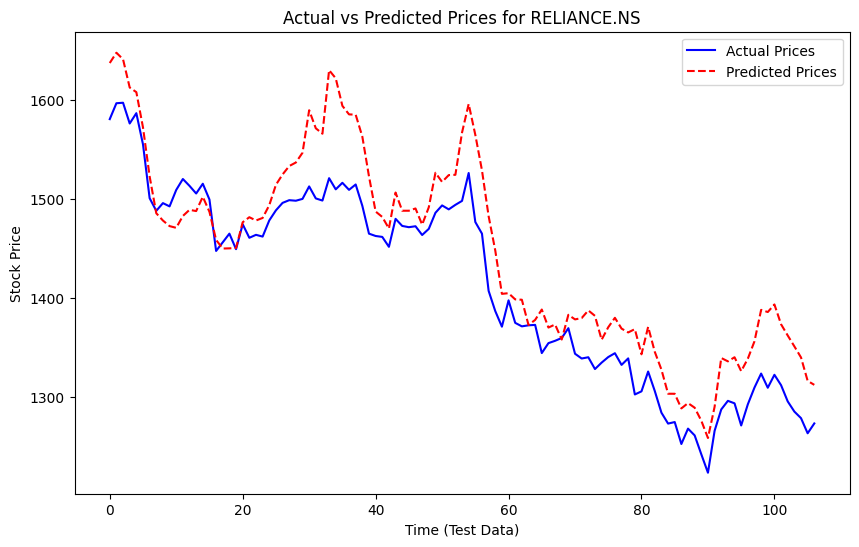

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted next day price for RELIANCE.NS: 1311.86
Next Day Predicted Price: 1311.8625


In [ ]:

# Run the prediction
ticker = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

next_day_price = stock_price_predictor(ticker, start_date, end_date)
print("Next Day Predicted Price:", next_day_price)

# **SUMMARIZATION OF PREDICTIONS AND RECOMMENDATIONS PROVIDED BY OUR SYSTEM**

In [9]:
import os
import pandas as pd
import numpy as np
import google.generativeai as genai
from typing import Dict, Any

class StockAdvisor:
    def __init__(self, api_key: str):
        """
        Initialize the Stock Advisor with Google Generative AI configuration

        :param api_key: Google Generative AI API key
        """
        genai.configure(api_key=api_key)
        self.model = genai.GenerativeModel('gemini-pro')
        self.chat = self.model.start_chat(history=[])

    def load_knowledge_base(self, file_path: str) -> str:
        """
        Load the stock market knowledge base

        :param file_path: Path to the knowledge base file
        :return: Knowledge base content as a string
        """
        with open(file_path, 'r') as file:
            return file.read()

    def generate_stock_recommendation(self, stock_data: Dict[str, Any], knowledge_base: str) -> str:
        """
        Generate comprehensive stock recommendation using AI and predefined knowledge base

        :param stock_data: Dictionary containing stock metrics and analysis
        :param knowledge_base: Loaded knowledge base content
        :return: Detailed stock recommendation report
        """
        # Prepare the prompt with stock data and knowledge base
        prompt = f"""
        Stock Market Knowledge Base: {knowledge_base}

        Stock Analysis Data:
        - Stock Symbol: {stock_data.get('symbol', 'N/A')}
        - Current Price: {stock_data.get('current_price', 'N/A')}
        - Risk Level: {stock_data.get('risk_level', 'N/A')}
        - Volatility: {stock_data.get('volatility', 'N/A')}
        - Daily Return: {stock_data.get('daily_return', 'N/A')}
        - Trend: {stock_data.get('trend', 'N/A')}
        - Sentiment Score: {stock_data.get('sentiment_score', 'N/A')}
        - Next Day Prediction: {stock_data.get('next_day_prediction', 'N/A')}

        Please provide a comprehensive investment recommendation that includes:
        1. Detailed rationale for recommendation
        2. Key metrics used in the analysis
        3. Potential risks and opportunities
        4. Recommended investment strategy
        """

        # Generate recommendation using AI
        response = self.chat.send_message(prompt)
        return response.text

    def analyze_stock(self, stock_symbol: str, stock_data: Dict[str, Any], knowledge_base_path: str) -> Dict[str, Any]:
        """
        Perform comprehensive stock analysis

        :param stock_symbol: Stock symbol to analyze
        :param stock_data: Dictionary of stock metrics
        :param knowledge_base_path: Path to the knowledge base file
        :return: Dictionary with stock analysis and recommendation
        """
        # Load knowledge base
        knowledge_base = self.load_knowledge_base(knowledge_base_path)

        # Generate AI-powered recommendation
        recommendation_report = self.generate_stock_recommendation(stock_data, knowledge_base)

        # Combine stock data with AI recommendation
        stock_analysis = {
            'symbol': stock_symbol,
            'metrics': stock_data,
            'recommendation_report': recommendation_report
        }

        return stock_analysis

    def risk_categorization(self, volatility: float) -> str:
        """
        Categorize stock risk based on volatility

        :param volatility: Stock volatility percentage
        :return: Risk category (Low/Medium/High)
        """
        if volatility < 20:
            return 'Low'
        elif 20 <= volatility < 30:
            return 'Medium'
        else:
            return 'High'

    def sentiment_classification(self, sentiment_score: float) -> str:
        """
        Classify sentiment based on score

        :param sentiment_score: Sentiment score (0-100)
        :return: Sentiment category
        """
        if sentiment_score >= 70:
            return 'Positive'
        elif 40 <= sentiment_score < 70:
            return 'Neutral'
        else:
            return 'Negative'

def main():
    # Example usage
    from google.colab import userdata

    api_key = userdata.get('GEMINI_API_KEY')  # Replace with actual API key
    knowledge_base_path = '/content/kb_for_stock_assessment.txt'

    # Sample stock data
    stock_data = {
        'symbol': 'RELIANCE.NS',
        'current_price': 1250.75,
        'volatility': 25.3,
        'daily_return': 0.65,
        'trend': 'Bullish',
        'sentiment_score': 72,
        'next_day_prediction': 1311.86
    }

    # Initialize Stock Advisor
    advisor = StockAdvisor(api_key)

    # Add risk and sentiment classification
    stock_data['risk_level'] = advisor.risk_categorization(stock_data['volatility'])
    stock_data['sentiment_category'] = advisor.sentiment_classification(stock_data['sentiment_score'])

    # Analyze stock
    stock_analysis = advisor.analyze_stock('RELIANCE.NS', stock_data, knowledge_base_path)

    # Print comprehensive analysis
    print("Stock Analysis Report:")
    print(f"Symbol: {stock_analysis['symbol']}")
    print("\nKey Metrics:")
    for metric, value in stock_analysis['metrics'].items():
        print(f"{metric.replace('_', ' ').title()}: {value}")

    print("\nRecommendation Report:")
    print(stock_analysis['recommendation_report'])

if __name__ == "__main__":
    main()

Stock Analysis Report:
Symbol: RELIANCE.NS

Key Metrics:
Symbol: RELIANCE.NS
Current Price: 1250.75
Volatility: 25.3
Daily Return: 0.65
Trend: Bullish
Sentiment Score: 72
Next Day Prediction: 1311.86
Risk Level: Medium
Sentiment Category: Positive

Recommendation Report:
**Investment Recommendation for RELIANCE.NS**

**Rationale**

Our analysis indicates that RELIANCE.NS presents a favorable investment opportunity with a positive sentiment score of 72 and a bullish trend. The stock's moderate risk level (Medium) and volatility (25.3%) suggest a balance between potential returns and associated risks. Positive news and social media sentiment indicate investor confidence in the company's prospects.

**Key Metrics**

* Sentiment Score: 72 (Positive)
* Risk Level: Medium
* Volatility: 25.3%
* Daily Return: 0.65%
* Trend: Bullish

**Potential Risks and Opportunities**

* Potential risks include macroeconomic factors, industry headwinds, and competitive pressures.
* Opportunities exist in the

In [10]:
import os
import google.generativeai as genai
from typing import Dict, Any

class StockAdvisor:
    def __init__(self, api_key: str):
        """
        Initialize the Stock Advisor with Google Generative AI configuration

        :param api_key: Google Generative AI API key
        """
        genai.configure(api_key=api_key)
        self.model = genai.GenerativeModel('gemini-pro')
        self.chat = self.model.start_chat(history=[])

    def load_knowledge_base(self, file_path: str) -> str:
        """
        Load the stock market knowledge base

        :param file_path: Path to the knowledge base file
        :return: Knowledge base content as a string
        """
        with open(file_path, 'r') as file:
            return file.read()

    def generate_stock_recommendation(self, stock_data: Dict[str, Any], knowledge_base: str) -> str:
        """
        Generate comprehensive stock recommendation using AI and predefined knowledge base

        :param stock_data: Dictionary containing stock metrics and analysis
        :param knowledge_base: Loaded knowledge base content
        :return: Detailed stock recommendation report
        """
        # Prepare the prompt with stock data and knowledge base
        prompt = f"""
        Stock Market Knowledge Base: {knowledge_base}

        Stock Analysis Data:
        - Stock Symbol: {stock_data.get('symbol', 'N/A')}
        - Current Price: {stock_data.get('current_price', 'N/A')}
        - Risk Level: {stock_data.get('risk_level', 'N/A')}
        - Volatility: {stock_data.get('volatility', 'N/A')}
        - Daily Return: {stock_data.get('daily_return', 'N/A')}
        - Trend: {stock_data.get('trend', 'N/A')}
        - Sentiment Score: {stock_data.get('sentiment_score', 'N/A')}
        - Next Day Prediction: {stock_data.get('next_day_prediction', 'N/A')}

        Please provide a comprehensive investment recommendation that includes:
        1. Detailed rationale for recommendation
        2. Key metrics used in the analysis
        3. Potential risks and opportunities
        4. Recommended investment strategy
        """

        # Generate recommendation using AI
        response = self.chat.send_message(prompt)
        return response.text

    def analyze_stock(self, stock_symbol: str, stock_data: Dict[str, Any], knowledge_base_path: str) -> Dict[str, Any]:
        """
        Perform comprehensive stock analysis

        :param stock_symbol: Stock symbol to analyze
        :param stock_data: Dictionary of stock metrics
        :param knowledge_base_path: Path to the knowledge base file
        :return: Dictionary with stock analysis and recommendation
        """
        # Load knowledge base
        knowledge_base = self.load_knowledge_base(knowledge_base_path)

        # Generate AI-powered recommendation
        recommendation_report = self.generate_stock_recommendation(stock_data, knowledge_base)

        # Combine stock data with AI recommendation
        stock_analysis = {
            'symbol': stock_symbol,
            'metrics': stock_data,
            'recommendation_report': recommendation_report
        }

        return stock_analysis

    def risk_categorization(self, volatility: float) -> str:
        """
        Categorize stock risk based on volatility

        :param volatility: Stock volatility percentage
        :return: Risk category (Low/Medium/High)
        """
        if volatility < 20:
            return 'Low'
        elif 20 <= volatility < 30:
            return 'Medium'
        else:
            return 'High'

    def sentiment_classification(self, sentiment_score: float) -> str:
        """
        Classify sentiment based on score

        :param sentiment_score: Sentiment score (0-100)
        :return: Sentiment category
        """
        if sentiment_score >= 70:
            return 'Positive'
        elif 40 <= sentiment_score < 70:
            return 'Neutral'
        else:
            return 'Negative'

def get_stock_insights(api_key: str, symbol: str, knowledge_base_path: str, stock_data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Modular function to get comprehensive stock insights

    :param api_key: Google Generative AI API key
    :param symbol: Stock symbol
    :param knowledge_base_path: Path to knowledge base file
    :param stock_data: Dictionary of stock metrics
    :return: Comprehensive stock analysis
    """
    # Initialize Stock Advisor
    advisor = StockAdvisor(api_key)

    # Add risk and sentiment classification
    stock_data['risk_level'] = advisor.risk_categorization(stock_data['volatility'])
    stock_data['sentiment_category'] = advisor.sentiment_classification(stock_data['sentiment_score'])

    # Analyze stock
    stock_analysis = advisor.analyze_stock(symbol, stock_data, knowledge_base_path)

    return stock_analysis

def display_stock_insights(stock_analysis: Dict[str, Any]):
    """
    Display stock insights in a formatted manner

    :param stock_analysis: Comprehensive stock analysis dictionary
    """
    print("Stock Analysis Report:")
    print(f"Symbol: {stock_analysis['symbol']}")

    print("\nKey Metrics:")
    for metric, value in stock_analysis['metrics'].items():
        print(f"{metric.replace('_', ' ').title()}: {value}")

    print("\nRecommendation Report:")
    print(stock_analysis['recommendation_report'])




In [11]:
# Example ticker data for HDFC Bank
hdfc_stock_data = {
    'symbol': 'HDFCBANK.NS',
    'current_price': 1540.50,
    'volatility': 22.5,
    'daily_return': 0.75,
    'trend': 'Bullish',
    'sentiment_score': 68,
    'next_day_prediction': 1555.25
}

from google.colab import userdata

API_KEY = userdata.get('GEMINI_API_KEY')  # Replace with actual API key
KNOWLEDGE_BASE_PATH = '/content/kb_for_stock_assessment.txt'

# Get stock insights
hdfc_analysis = get_stock_insights(
    api_key=API_KEY,
    symbol=hdfc_stock_data['symbol'],
    knowledge_base_path=KNOWLEDGE_BASE_PATH,
    stock_data=hdfc_stock_data
)

# Display insights
display_stock_insights(hdfc_analysis)

Stock Analysis Report:
Symbol: HDFCBANK.NS

Key Metrics:
Symbol: HDFCBANK.NS
Current Price: 1540.5
Volatility: 22.5
Daily Return: 0.75
Trend: Bullish
Sentiment Score: 68
Next Day Prediction: 1555.25
Risk Level: Medium
Sentiment Category: Neutral

Recommendation Report:
**Investment Recommendation for HDFCBANK.NS**

**Recommendation:** Buy

**Rationale:**

* **Moderate Risk:** HDFCBANK.NS carries a medium risk level, indicating a balance between potential returns and volatility.
* **Stable Growth:** The stock has a bullish trend, suggesting ongoing price appreciation supported by positive market sentiment.
* **Positive Sentiment:** A sentiment score of 68 (Positive) reflects optimistic market sentiment towards the stock, aligning with its bullish trend.
* **High Volatility:** The volatility of 22.5% indicates potential price fluctuations, presenting both opportunities for gains as well as risks for losses.

**Key Metrics:**

* Risk Level: Medium
* Volatility: 22.5%
* Daily Return: 0.75%

# **BUY/SELL SIGNALS FOR INTRADAY AND SWING STRATEGIES**

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFY.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2020-01-01 -> 2024-01-01) (Yahoo error = "15m data not available for startTime=1577817000 and endTime=1704047400. The requested range must be within the last 60 days.")')


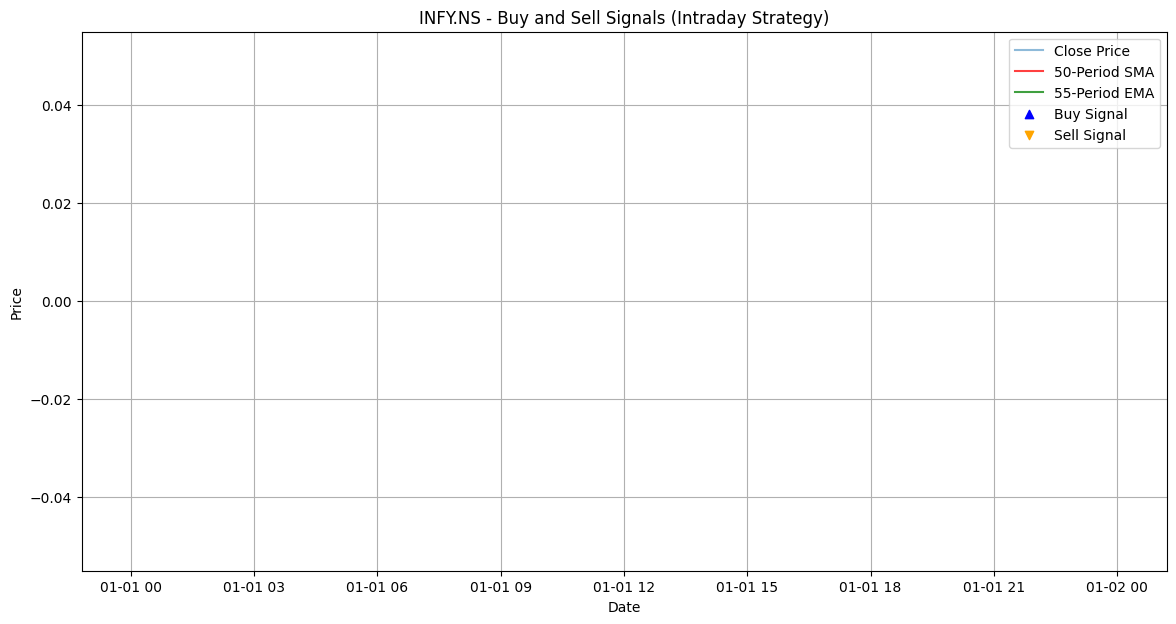

[*********************100%***********************]  1 of 1 completed

Final Profit from ₹100,000 investment in INFY.NS (Intraday Strategy): ₹100000.00



<ipython-input-1-122ca48b1128>:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  buy_price = float(df['Buy_Signal'].iloc[i])
<ipython-input-1-122ca48b1128>:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sell_price = float(df['Sell_Signal'].iloc[i])
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


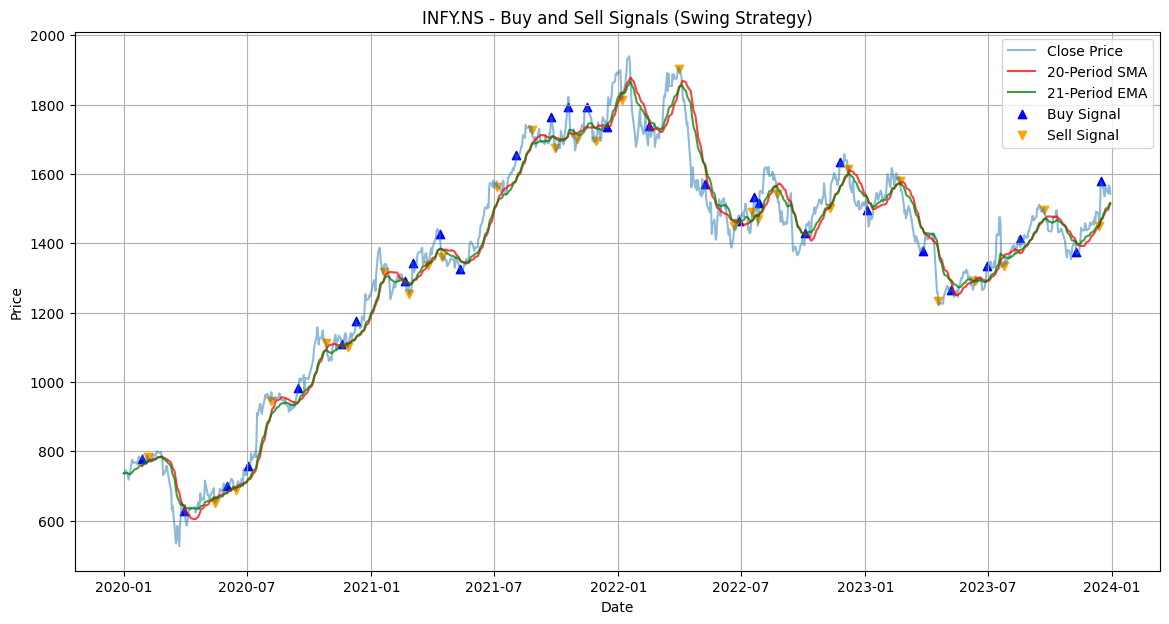

Final Profit from ₹100,000 investment in INFY.NS (Swing Strategy): ₹183196.14


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_ticker(ticker, start_date="2020-01-01", end_date="2024-01-01", initial_investment=100000, strategy="swing"):
    # Fetch data with appropriate interval based on strategy
    interval = "15m" if strategy == "intraday" else "1d"
    df = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    # Define moving average periods based on strategy
    sma_period = 50 if strategy == "intraday" else 20
    ema_period = 55 if strategy == "intraday" else 21

    # Calculate SMA and EMA
    df[f'{sma_period}SMA'] = df['Close'].rolling(window=sma_period).mean()
    df[f'{ema_period}EMA'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    # Identify buy and sell signals
    buy_signals = []
    sell_signals = []
    in_position = False

    for i in range(len(df)):
        if df[f'{ema_period}EMA'].iloc[i] > df[f'{sma_period}SMA'].iloc[i] and not in_position:
            buy_signals.append(df['Close'].iloc[i])
            sell_signals.append(np.nan)
            in_position = True
        elif df[f'{ema_period}EMA'].iloc[i] < df[f'{sma_period}SMA'].iloc[i] and in_position:
            sell_signals.append(df['Close'].iloc[i])
            buy_signals.append(np.nan)
            in_position = False
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)

    df['Buy_Signal'] = buy_signals
    df['Sell_Signal'] = sell_signals

    # Calculate profit
    positions = []
    for i in range(len(df)):
        buy_price = float(df['Buy_Signal'].iloc[i])
        sell_price = float(df['Sell_Signal'].iloc[i])

        if not np.isnan(buy_price):  # Check for valid buy signal
            positions.append(initial_investment / buy_price)
        elif not np.isnan(sell_price) and len(positions) > 0:  # Check for valid sell signal and non-empty positions
            initial_investment = positions.pop() * sell_price

    final_profit = initial_investment

    # Visualization
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df[f'{sma_period}SMA'], label=f'{sma_period}-Period SMA', color='red', alpha=0.75)
    plt.plot(df[f'{ema_period}EMA'], label=f'{ema_period}-Period EMA', color='green', alpha=0.75)
    plt.scatter(df.index, df['Buy_Signal'], label='Buy Signal', marker='^', color='blue', alpha=1)
    plt.scatter(df.index, df['Sell_Signal'], label='Sell Signal', marker='v', color='orange', alpha=1)
    plt.title(f'{ticker} - Buy and Sell Signals ({strategy.capitalize()} Strategy)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Final Profit from ₹100,000 investment in {ticker} ({strategy.capitalize()} Strategy): ₹{final_profit:.2f}")

# Example usage
analyze_ticker("INFY.NS", strategy="intraday")  # Intraday strategy
analyze_ticker("INFY.NS", strategy="swing")     # Swing strategy


# **DATES, CURRENT INVESTMENT AMOUNT, STRATEGY, AND NET INVESTED CAPITAL FOR EACH BUY AND SELL DAY**

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFY.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2020-01-01 -> 2024-01-01) (Yahoo error = "15m data not available for startTime=1577817000 and endTime=1704047400. The requested range must be within the last 60 days.")')


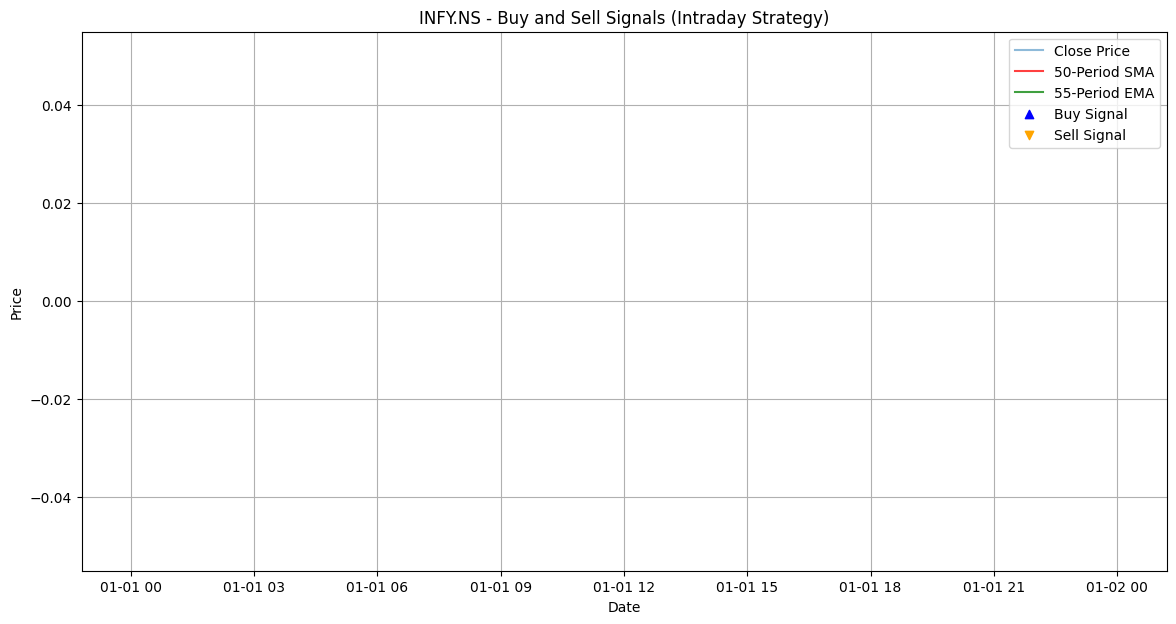

[*********************100%***********************]  1 of 1 completed

Final Profit from ₹100,000 investment in INFY.NS (Intraday Strategy): ₹100000.00

Investment Summary:



<ipython-input-5-bc7fec134f4e>:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_investment = float(shares * sell_price)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


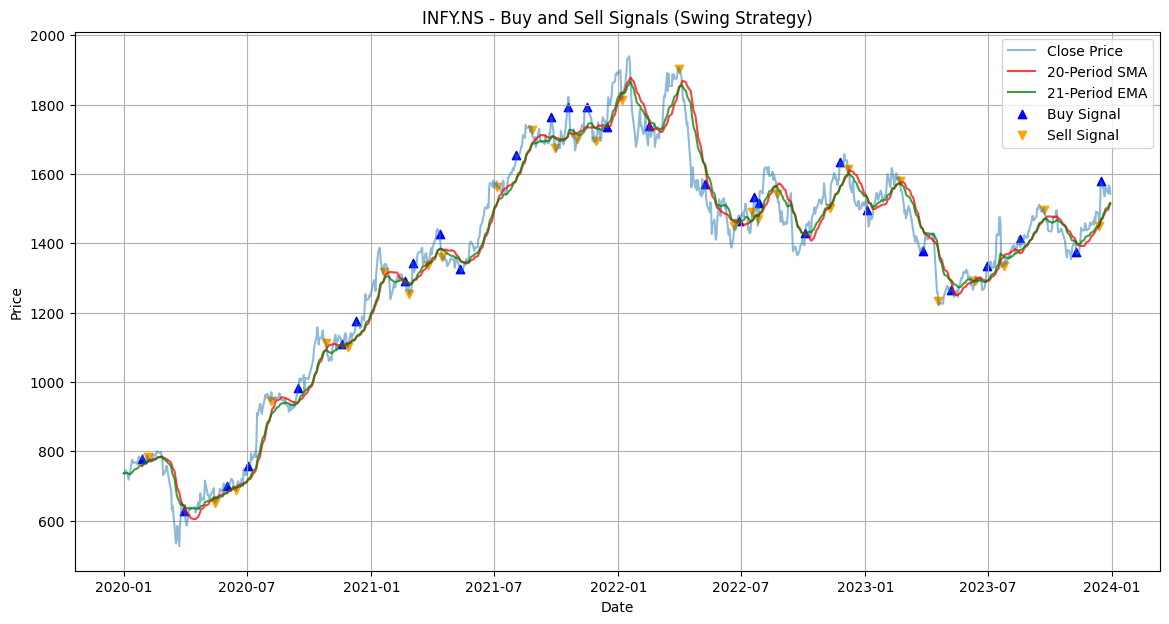

Final Profit from ₹100,000 investment in INFY.NS (Swing Strategy): ₹183196.14

Investment Summary:
{'Date': Timestamp('2020-01-28 00:00:00'), 'Type': 'Buy', 'Price': Ticker
INFY.NS    778.0
Name: 2020-01-28 00:00:00, dtype: float64, 'Current Investment': 100000.0, 'Net Cap': 100000.0, 'Strategy': 'swing'}
{'Date': Timestamp('2020-02-05 00:00:00'), 'Type': 'Sell', 'Price': Ticker
INFY.NS    784.549988
Name: 2020-02-05 00:00:00, dtype: float64, 'Current Investment': 100841.90074459753, 'Net Cap': 100841.90074459753, 'Strategy': 'swing'}
{'Date': Timestamp('2020-03-30 00:00:00'), 'Type': 'Buy', 'Price': Ticker
INFY.NS    626.700012
Name: 2020-03-30 00:00:00, dtype: float64, 'Current Investment': 100841.90074459753, 'Net Cap': 100841.90074459753, 'Strategy': 'swing'}
{'Date': Timestamp('2020-05-15 00:00:00'), 'Type': 'Sell', 'Price': Ticker
INFY.NS    652.299988
Name: 2020-05-15 00:00:00, dtype: float64, 'Current Investment': 104961.17654931606, 'Net Cap': 104961.17654931606, 'Strategy': '

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_ticker(ticker, start_date="2020-01-01", end_date="2024-01-01", initial_investment=100000, strategy="swing"):
    # Fetch data with appropriate interval based on strategy
    interval = "15m" if strategy == "intraday" else "1d"
    df = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    # Define moving average periods based on strategy
    sma_period = 50 if strategy == "intraday" else 20
    ema_period = 55 if strategy == "intraday" else 21

    # Calculate SMA and EMA
    df[f'{sma_period}SMA'] = df['Close'].rolling(window=sma_period).mean()
    df[f'{ema_period}EMA'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

    # Identify buy and sell signals
    buy_signals = []
    sell_signals = []
    in_position = False

    investments = []  # Track investments and net capital
    current_investment = float(initial_investment)
    shares = 0  # Track the number of shares held

    for i in range(len(df)):
        date = df.index[i]
        if df[f'{ema_period}EMA'].iloc[i] > df[f'{sma_period}SMA'].iloc[i] and not in_position:
            buy_price = df['Close'].iloc[i]
            buy_signals.append(buy_price)
            sell_signals.append(np.nan)
            shares = current_investment / buy_price
            investments.append({
                'Date': date,
                'Type': 'Buy',
                'Price': buy_price,
                'Current Investment': current_investment,
                'Net Cap': current_investment,
                'Strategy': strategy
            })
            in_position = True
        elif df[f'{ema_period}EMA'].iloc[i] < df[f'{sma_period}SMA'].iloc[i] and in_position:
            sell_price = df['Close'].iloc[i]
            sell_signals.append(sell_price)
            buy_signals.append(np.nan)
            current_investment = float(shares * sell_price)
            investments.append({
                'Date': date,
                'Type': 'Sell',
                'Price': sell_price,
                'Current Investment': current_investment,
                'Net Cap': current_investment,
                'Strategy': strategy
            })
            shares = 0
            in_position = False
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)

    df['Buy_Signal'] = buy_signals
    df['Sell_Signal'] = sell_signals

    # Final profit
    final_profit = float(current_investment)

    # Visualization
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df[f'{sma_period}SMA'], label=f'{sma_period}-Period SMA', color='red', alpha=0.75)
    plt.plot(df[f'{ema_period}EMA'], label=f'{ema_period}-Period EMA', color='green', alpha=0.75)
    plt.scatter(df.index, df['Buy_Signal'], label='Buy Signal', marker='^', color='blue', alpha=1)
    plt.scatter(df.index, df['Sell_Signal'], label='Sell Signal', marker='v', color='orange', alpha=1)
    plt.title(f'{ticker} - Buy and Sell Signals ({strategy.capitalize()} Strategy)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Final Profit from ₹100,000 investment in {ticker} ({strategy.capitalize()} Strategy): ₹{final_profit:.2f}")
    print("\nInvestment Summary:")
    for entry in investments:
        print(entry)

# Example usage
analyze_ticker("INFY.NS", strategy="intraday")  # Intraday strategy
analyze_ticker("INFY.NS", strategy="swing")     # Swing strategy
